# Recommendation

---

In This notebook I am finally going to make some recommendations.

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


invest_dict = pickle.load( open( "./Python-Files/investigation_dict.p", "rb" ) )
existn_dict = pickle.load( open( "./Python-Files/existing_dict.p", "rb" ) )

Lets take a look at the distribution of balance values.
- Type Combos that are very strong will have large positive values.
- Type Combos that are good fits will have values close to 0.
- Type Combos that are very weak will have large negative values.

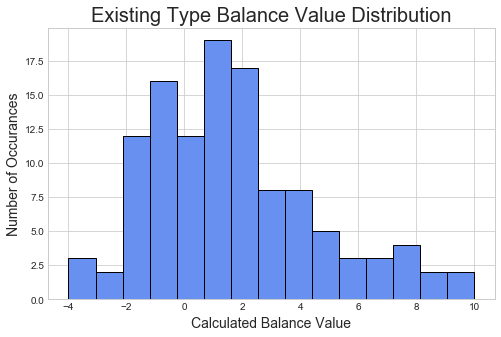

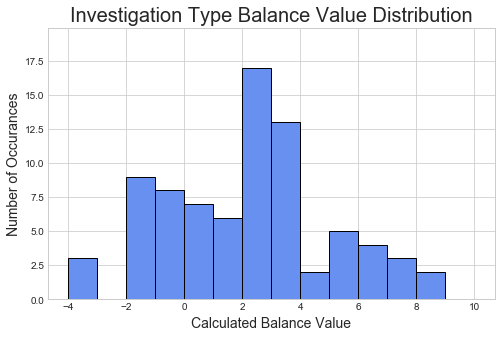

In [2]:
sns.set_style('whitegrid')

# Existing Values
plt.figure(figsize = (8,5))
ax1 = plt.subplot() 
E_balance_values = [existn_dict[key]['balance_value'] for key in existn_dict.keys()]
plt.hist(E_balance_values, ec = 'Black',bins = len(set(E_balance_values)),color = '#6890F0')
plt.title("Existing Type Balance Value Distribution", fontsize = 20)
plt.xlabel("Calculated Balance Value",fontsize = 14)
plt.ylabel("Number of Occurances",fontsize = 14)
plt.show();

# New Values
plt.figure(figsize = (8,5))
ax2 = plt.subplot( sharex = ax1, sharey = ax1)
I_balance_values = [invest_dict[key]['balance_value'] for key in invest_dict.keys()]
plt.hist(I_balance_values, ec = 'Black',bins = len(set(I_balance_values)),color = '#6890F0')
plt.title("Investigation Type Balance Value Distribution", fontsize = 20, )
plt.xlabel("Calculated Balance Value",fontsize = 14)
plt.ylabel("Number of Occurances",fontsize = 14)
plt.show();



So, the first thing is  there are quite a few 1s and 2s the currently exist and even up to a few 10s (will have a quick peak)

There are also a good deal of values between -2 and 2 which is good that there is untapped potential.

In [3]:
# Extra Strong Types RN
[print(key) for key in existn_dict.keys() if existn_dict[key]['balance_value'] >= 9];
# Common Theme of being a Steel type

Fairy & Steel
Flying & Steel
Ghost & Steel
Ground & Steel


In [4]:
# Extra Weak Types RN
[print(key) for key in existn_dict.keys() if existn_dict[key]['balance_value'] < -2];
# Common theme of being super weak to fire

Grass
Grass & Ice
Poison
Bug & Grass
Bug


In [5]:
# Extra Strong Types Under Investigation
[print(key) for key in invest_dict.keys() if invest_dict[key]['balance_value'] >= 7];
# Common Theme of being a Steel type again..

Poison & Steel
Ice & Steel
Fire & Ground
Ground & Steel
Dragon & Steel


In [6]:
# Extra Weak Types RN
[print(key) for key in invest_dict.keys() if invest_dict[key]['balance_value'] < -2];
# 

Dragon & Grass
Bug & Ice
Dragon & Ice


In [7]:
invest_df = pd.DataFrame(columns = ['Type Name','Count Def. Adv. Dev.', 'Count Def. Dis. Dev.', 
                                    'Count Off. Adv. Dev.','Count Off. Dis. Dev.','Count Imm. Dev.', 
                                    'Def. Pwr. Dev.', 'Off Pwr. Dev.', 'Balance Value'])
for key in invest_dict.keys():
    temp_list = invest_dict[key]['deviation_list']
    temp_list.append(invest_dict[key]['balance_value'])
    temp_list.insert(0,key)
    invest_df.loc[len(invest_df)] = temp_list

In [8]:
invest_df.head()

,Type Name,Count Def. Adv. Dev.,Count Def. Dis. Dev.,Count Off. Adv. Dev.,Count Off. Dis. Dev.,Count Imm. Dev.,Def. Pwr. Dev.,Off Pwr. Dev.,Balance Value
0,Dragon & Grass,0.811061,2.411639,0.075005,0.785087,0.616534,2.192015,0.384599,-4
1,Electric & Grass,0.811061,0.544473,0.075005,0.275201,0.616534,0.360826,0.201627,-2
2,Bug & Psychic,0.811061,2.411639,0.575286,0.785087,0.616534,1.407220,0.750545,-2
3,Poison & Steel,2.287323,1.322693,0.075005,0.785087,0.782201,1.731963,0.384599,7
4,Ghost & Rock,0.811061,2.411639,1.075567,1.294973,2.180936,0.360826,1.299463,3


In [10]:
invest_df.set_index('Type Name', inplace = True)

In [11]:
invest_df['Balance Value'] = invest_df['Balance Value'].astype(float)

In [12]:
# Calculate Average Deviation
invest_df['Average Deviation'] = invest_df.drop('Balance Value', axis =1).mean(axis = 1)

In [13]:
# Calculate the Balance Value Deviation from 0
def std_from_zero(bv):
    return (bv/np.std(invest_df['Balance Value']))

invest_df['BV Deviance from 0'] = invest_df['Balance Value'].apply(std_from_zero)




In [19]:
# Sorting by Balance Value Absolute Value.
invest_df['sort'] = invest_df['Balance Value'].abs()
invest_df.sort_values(by='sort', inplace =True)
invest_df.drop('sort', axis=1, inplace=True)

In [20]:
invest_df.head()

,Count Def. Adv. Dev.,Count Def. Dis. Dev.,Count Off. Adv. Dev.,Count Off. Dis. Dev.,Count Imm. Dev.,Def. Pwr. Dev.,Off Pwr. Dev.,Balance Value,Average Deviation,BV Deviance from 0
Type Name,,,,,,,,,,
Fire & Ice,0.811061,0.544473,1.575848,0.275201,0.616534,1.407220,1.299463,0.0,0.932829,0.0
Dragon & Electric,0.428292,0.544473,0.425276,1.294973,0.616534,0.162371,0.201627,0.0,0.524792,0.0
Fairy & Fairy,0.428292,0.389110,0.425276,0.234685,0.616534,0.816368,0.347291,0.0,0.465365,0.0
Fire & Normal,0.428292,0.544473,0.075005,0.785087,0.782201,0.554769,0.384599,0.0,0.507775,0.0
Bug & Fairy,0.191384,1.478056,0.575286,0.234685,0.782201,0.099227,0.384599,0.0,0.535063,0.0


In [21]:
# Red, yellow, green, yellow, red - Diverging color scheme
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','yellow','green','yellow','red'])

### Lets break the Investigation up into Quartiles
----

**1st Quartile : Best Recommendations**

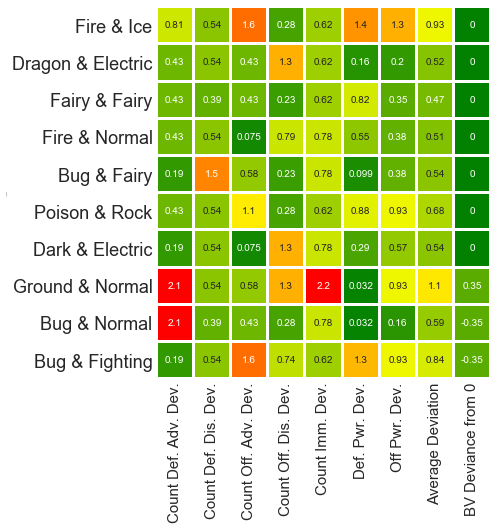

In [38]:
plt.figure(figsize = (6,7))
plt.yticks(fontsize = 18)
plt.ylabel('', fontsize = 0)
plt.xticks(fontsize = 15)

sns.heatmap(invest_df.iloc[:10].drop('Balance Value', axis =1) ,annot=True, square = True, cbar = False,
            linewidths = 2,cmap = cmap, vmax =2, center = 0);

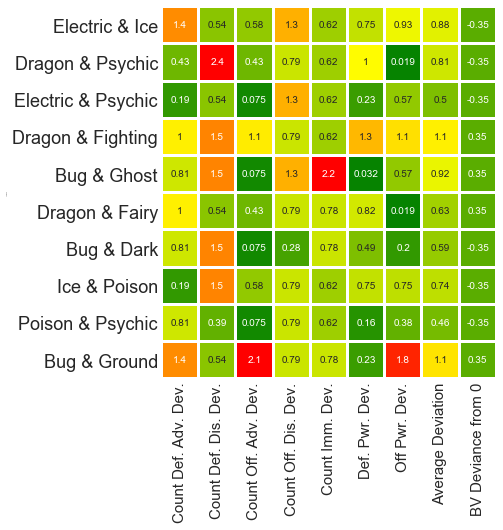

In [39]:
plt.figure(figsize = (6,7))
plt.yticks(fontsize = 18)
plt.ylabel('', fontsize = 0)
plt.xticks(fontsize = 15)

sns.heatmap(invest_df.iloc[10:20].drop('Balance Value', axis =1) ,annot=True, square = True, cbar = False,
            linewidths = 2,cmap = cmap, vmax =2, center = 0);

**2nd Quartile : Stretch Recommendations**

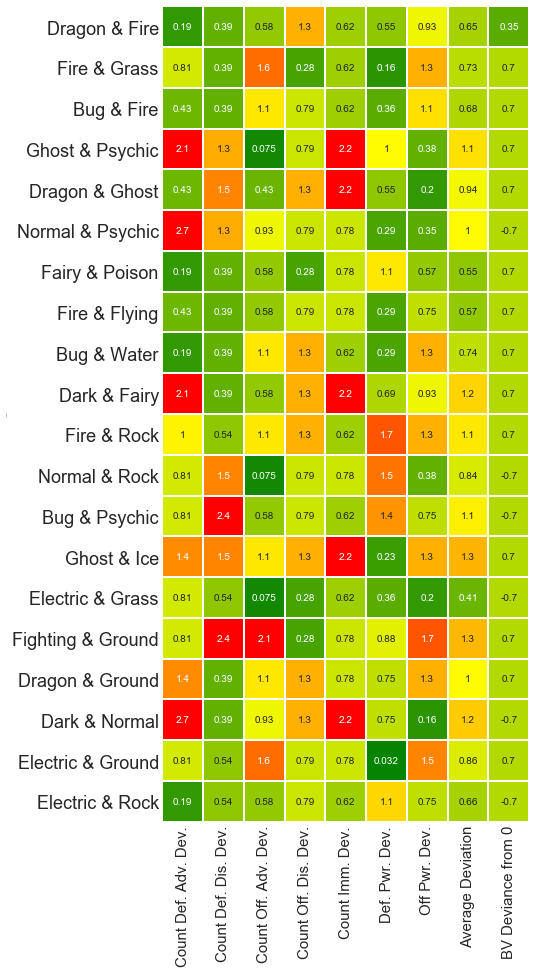

In [37]:
plt.figure(figsize = (12,15))
plt.yticks(fontsize = 18)
plt.ylabel('', fontsize = 0)
plt.xticks(fontsize = 15)

sns.heatmap(invest_df.iloc[20:40].drop('Balance Value', axis =1) ,annot=True, square = True, cbar = False,
            linewidths = 1,cmap = cmap, vmax =2, center = 0);

** 3rd Quartile : Not Recommended/Require Further Research**

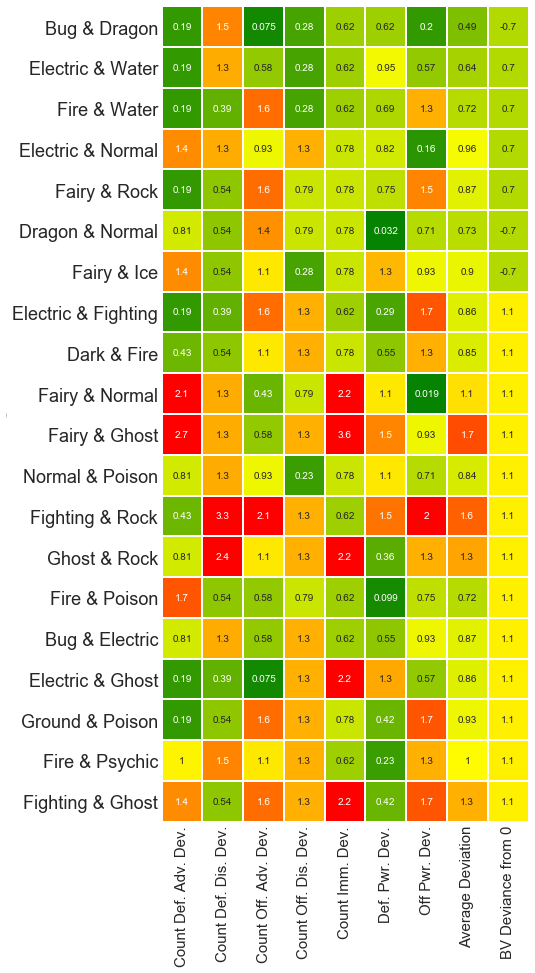

In [36]:
plt.figure(figsize = (12,15))
plt.yticks(fontsize = 18)
plt.ylabel('', fontsize = 0)

plt.xticks(fontsize = 15)

sns.heatmap(invest_df.iloc[40:60].drop('Balance Value', axis =1) ,annot=True, square = True, cbar = False,
            linewidths = 1,cmap = cmap, vmax =2, center = 0);

** 4th Quartile : Recommended to Avoid**

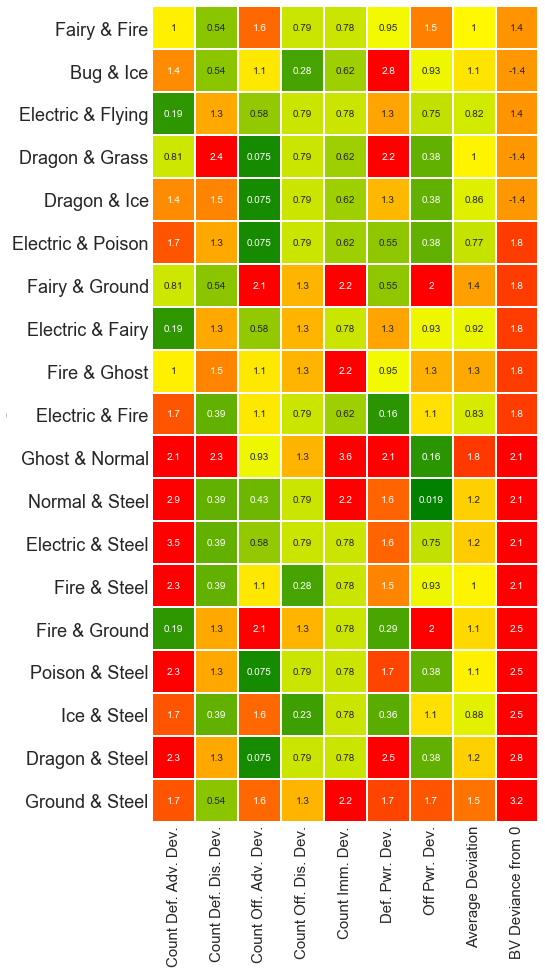

In [35]:
plt.figure(figsize = (12,15))
plt.yticks(fontsize = 18)
plt.ylabel('', fontsize = 0)
plt.xticks(fontsize = 15)

sns.heatmap(invest_df.iloc[60:].drop('Balance Value', axis =1) ,annot=True, square = True, cbar = False,
            linewidths = 1,cmap = cmap, vmax =2, center = 0);